In [72]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots

## Preprocessing

In [73]:
df1 = pd.read_csv("../input/cough-test-files/with_coswara_csv_random.txt")

In [74]:
df1.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1381_Negative_male_25,0.373108,0.103048,1516.929678,1545.770204,2884.203084,0.129885,-351.952484,76.321884,1.885933,-0.936966,-16.348080,-0.853601,-4.714133,-2.069972,-21.479202,-16.073103,-2.027748,-6.319023,5.590426,-8.792586,-8.878917,5.265393,-7.280386,-6.601923,-3.785926,-8.279180,negative
1,1361_Negative_female_29,0.431043,0.040610,2331.565850,2187.452698,4536.128743,0.145605,-352.414002,57.131027,-5.597057,0.238275,-22.406155,-8.955688,-6.573583,-11.739659,-16.437290,-1.263172,-16.469601,-3.530197,-3.735051,-0.198332,-9.839769,-5.315788,-5.830561,-7.077991,-11.191503,-4.469076,negative
2,441_Negative_male_28,0.246386,0.045692,1472.640673,1122.657441,2774.892171,0.094374,-442.721405,29.733435,0.579967,12.421374,-7.678332,4.953801,-14.567701,-0.664125,-1.292122,-5.707313,-5.511070,-5.281614,0.508828,-6.290066,-3.370740,-4.927048,-0.710448,-3.572655,-4.234689,-1.949135,negative
3,614_Negative_female_20,0.419028,0.050483,4197.899973,2831.040318,7405.577596,0.304532,-373.675934,14.595305,5.769903,-0.834958,-11.409932,8.327916,-15.584456,-16.266516,-9.525184,10.998933,-18.677462,-9.084852,-2.159809,-1.015262,-2.692306,-3.562034,-0.345276,-1.711086,-0.870945,3.266410,negative
4,923_Negative_male_36,0.375026,0.051147,1588.118931,1582.605184,2882.308960,0.127905,-386.012665,73.902275,-23.263975,1.941533,4.942948,13.639863,-6.805795,-10.881898,-18.707548,1.111569,0.718200,-10.422381,-0.405529,-4.789918,1.348900,0.292386,-4.678143,-1.257457,0.507745,-3.821487,negative


In [80]:
test1 = df1.iloc[[0]]

In [81]:
test3 = test1.iloc[:, :26]

In [82]:
test2 = scaler.transform(test3)

In [83]:
test2

array([[0.51690298, 0.2961306 , 0.28795144, 0.46437826, 0.32312881,
        0.26819739, 0.70234466, 0.44331687, 0.68682609, 0.20990747,
        0.52980542, 0.5004368 , 0.56578303, 0.4105817 , 0.30343004,
        0.23755427, 0.67521183, 0.4797079 , 0.66364312, 0.45688869,
        0.42431383, 0.79601255, 0.38640475, 0.44657474, 0.40879695,
        0.19318693]])

In [75]:
df1 = df1.drop(['filename'], axis = 1)

In [76]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score


In [77]:
df1.drop_duplicates(keep=False,inplace=True)

In [78]:
df1.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,0.412896,0.050045,2269.019321,1874.910843,4259.692696,0.177748,-394.400105,60.011278,-19.679762,9.377144,-13.036684,4.076993,-12.499481,-6.471927,-10.162300,-3.196305,-3.391868,-6.744501,-1.653810,-4.946448,-2.888967,-4.357289,-3.729129,-4.716758,-3.746057,-3.156568
std,0.092488,0.032446,709.047163,527.176656,1344.736990,0.079779,97.673298,27.940782,18.899891,13.297631,13.453418,10.758504,10.456671,7.947581,7.748056,6.654396,5.808351,5.831221,5.270970,5.441667,4.743881,4.398638,4.231459,4.021906,3.770508,3.519806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.370850,-12.340955,-93.683403,-32.808620,-66.684090,-43.286739,-50.802757,-40.846672,-41.419239,-29.247881,-35.731224,-29.863237,-21.109362,-28.529547,-26.131557,-23.581474,-23.464804,-22.772987,-18.094671,-16.055946
25%,0.363775,0.027871,1797.556736,1561.718137,3336.918940,0.120177,-450.081924,40.516369,-30.683103,1.378803,-21.303617,-2.199738,-18.789622,-11.435881,-14.908325,-7.370489,-6.584445,-10.263752,-4.748589,-8.103712,-5.923141,-7.160191,-6.405469,-7.011875,-6.034631,-5.158777
50%,0.424388,0.045563,2247.639316,1897.281753,4268.807983,0.164408,-392.510376,56.098648,-17.870413,8.786664,-12.518476,4.062473,-11.649062,-6.262459,-9.840461,-3.213549,-2.903779,-6.543793,-1.581622,-4.927974,-2.547154,-4.094884,-3.591660,-4.614801,-3.563850,-3.112150
75%,0.471580,0.064724,2702.082763,2203.984207,5067.679850,0.224681,-339.334839,74.802036,-6.877692,17.195486,-4.411615,10.755668,-5.662745,-1.593208,-5.159657,0.908255,0.210398,-3.207060,1.808232,-1.631279,-0.032296,-1.768477,-0.943554,-2.332687,-1.390034,-1.128585
max,0.721814,0.347983,5268.005149,3328.687734,8925.861613,0.484289,-21.633121,187.657837,45.462936,119.028061,28.324394,41.505463,30.657133,53.596649,24.296194,26.212194,14.184187,19.217077,19.122786,14.669072,14.528538,12.657738,18.419819,13.438342,16.907413,24.199194


In [79]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Preparing the data
genre_list = df1.iloc[:, -1]
y = genre_list
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))
X1 = df1.iloc[:,:-1]

In [45]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 1340, 1: 111})
SMOTE data distribution: Counter({0: 1340, 1: 1340})


Accuracy of logistic regression classifier on test set: 0.74
classification report:              precision    recall  f1-score   support

          0       0.98      0.73      0.84       270
          1       0.19      0.81      0.31        21

avg / total       0.92      0.74      0.80       291



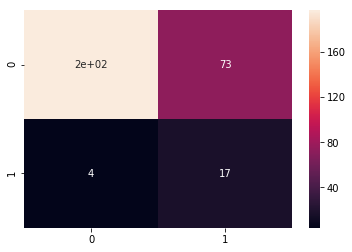

In [35]:
# Refer https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_smote, y_smote)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

clf_rpt = classification_report(y_test,y_pred)
print("classification report:", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [10]:
smote_model

Pipeline(memory=None,
     steps=[('smote', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=4, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [12]:
y_pred = smote_prediction

Accuracy = 0.8969072164948454
classification report:              precision    recall  f1-score   support

          0       0.94      0.95      0.94       270
          1       0.26      0.24      0.25        21

avg / total       0.89      0.90      0.89       291



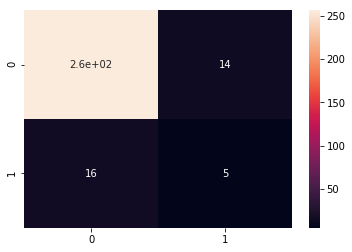

In [14]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

clf_rpt = classification_report(y_test,y_pred)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("classification report:", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
# # the function that we will use to better evaluate the model
# def print_results(headline, true_value, pred):
#     print(headline)
#     print("accuracy: {}".format(accuracy_score(true_value, pred)))
#     print("precision: {}".format(precision_score(true_value, pred)))
#     print("recall: {}".format(recall_score(true_value, pred)))
#     print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# # splitting data into training and test set
# X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=2, test_size=0.33)

# classifier = RandomForestClassifier

# # build model with SMOTE imblearn
# smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
#                                    classifier(random_state=42))

# smote_model = smote_pipeline.fit(X_train, y_train)
# smote_prediction = smote_model.predict(X_test)

# #Showing the diference before and after the transformation used
# print("normal data distribution: {}".format(Counter(y)))
# X_smote1, y_smote1 = SMOTE().fit_sample(X1, y)
# print("SMOTE data distribution: {}".format(Counter(y_smote)))

In [ ]:
# y_smote1

In [36]:
df1.columns

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [37]:
features = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']

In [38]:
X_s = pd.DataFrame(X_smote, columns = features)
y_s = pd.DataFrame(y_smote, columns = ['label'])

In [39]:
# X_s1 = pd.DataFrame(X_smote1, columns = features)

In [40]:
X_s.to_csv('X_smote.csv', index=False)

In [41]:
y_s.to_csv('y_smote.csv', index=False)

In [42]:
X_s.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000
mean,0.574765,0.138841,0.421345,0.553645,0.466527,0.373022,0.656634,0.379177,0.533557,0.281579,0.553063,0.556858,0.457497,0.350003,0.463050,0.440711,0.637525,0.455904,0.477525,0.526216,0.567259,0.509783,0.452463,0.494650,0.391138,0.313865
std,0.115649,0.085488,0.125809,0.143752,0.139771,0.166272,0.083090,0.139658,0.126884,0.084442,0.125374,0.118713,0.124263,0.082345,0.112915,0.113257,0.110792,0.109970,0.129511,0.122314,0.109226,0.112035,0.098779,0.097576,0.106101,0.080346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.516088,0.079640,0.328708,0.465598,0.363067,0.250787,0.614028,0.278552,0.466637,0.229345,0.478785,0.484431,0.375109,0.298937,0.392486,0.375287,0.579290,0.391353,0.412246,0.447280,0.496355,0.434628,0.396567,0.441736,0.331261,0.267680
50%,0.586217,0.128829,0.422828,0.567419,0.475639,0.337929,0.661015,0.354645,0.544853,0.281652,0.557434,0.553436,0.469908,0.352679,0.471109,0.434177,0.648551,0.454430,0.484955,0.529020,0.570731,0.510523,0.457863,0.499618,0.403540,0.316850
75%,0.645552,0.183104,0.494332,0.645194,0.555713,0.479541,0.707478,0.460094,0.618665,0.331543,0.629577,0.633510,0.542039,0.402835,0.533329,0.509774,0.706925,0.522460,0.557903,0.609309,0.637880,0.579575,0.515887,0.550055,0.458474,0.362102
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# X_s1.shape

In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression(C=10, penalty='l2',random_state=2))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [('pca', PCA(n_components=13)), ('m', RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
PCA(n_components=13)

In [ ]:
we = pd.DataFrame(X, columns = features)

In [ ]:
we

In [ ]:
X

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 10)
# fit = pca.fit(X)
# print(("Explained Variance: %s") % (fit.explained_variance_ratio_))
# print(fit.components_)

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_s),
    feature_names=X_s.columns,
    mode='classification'
)

## Evaluating the model SMOTE + Random Forest

In [17]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[256  14]
 [ 16   5]]

SMOTE Pipeline Score 0.8969072164948454

SMOTE + RandomForest classification
accuracy: 0.8969072164948454
precision: 0.2631578947368421
recall: 0.23809523809523808
f2: 0.2427184466019417


In [18]:
# exp = interpretor.explain_instance(
#     data_row=X_s_t.iloc[5], ##new data
#     predict_fn=smote_pipeline.predict_proba
# )

# exp.show_in_notebook(show_table=True)

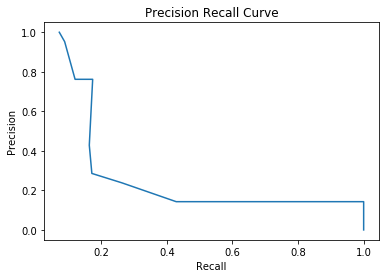

In [19]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# This ROC Curve is a overfitted curve, how can I fix this problem and get a correct 

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.grid_search import GridSearchCV

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
# Running the fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9922413793103448


In [23]:
# Printing the Test Score
print("Test score data: ")
print(rf.score(X_test, y_test))

Test score data: 
0.9347079037800687


In [24]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[269   1]
 [ 18   3]]
RF classification
accuracy: 0.9347079037800687
precision: 0.75
recall: 0.14285714285714285
f2: 0.17045454545454544


## Feature importance plot

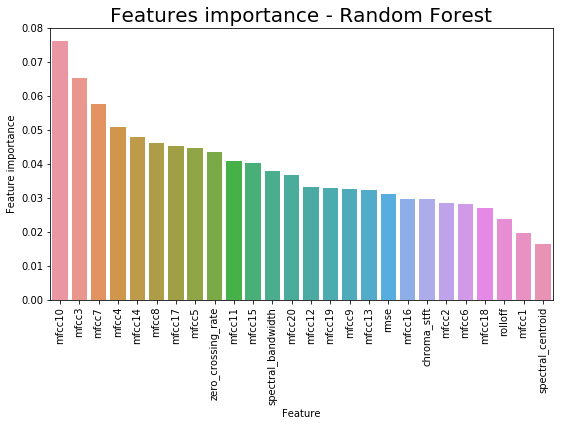

In [25]:
features = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']

# Credits to Gabriel Preda
# https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models
plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

## ROC CURVE - Random Forest

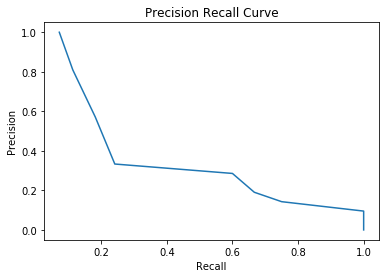

In [26]:
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [27]:
rf.score(X_test,y_test)

0.9347079037800687

In [28]:
results = cross_val_score(rf,X_train, y_train, cv=10, scoring='recall')
results

array([0.11111111, 0.11111111, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## Modelling Logistic Regression with Hyper Parameters

In [29]:
param_grid = {'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2']}

logreg = LogisticRegression(random_state=2)

grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5)

grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [30]:
# The best recall obtained
print(grid_search_lr.best_score_)
#Best parameter on trainning set
print(grid_search_lr.best_params_)

0.04444444444444444
{'C': 10, 'penalty': 'l1'}


### Setting the best parameters as parameters of our model

In [31]:
# Creating the model 
logreg = LogisticRegression(C=10, penalty='l1',random_state=2)

#Fiting the model
logreg.fit(X_train, y_train)
           
# Printing the Training Score
print("Cross Validation of X and y Train: ")
print(cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))

Cross Validation of X and y Train: 
[0.05555556 0.         0.05555556 0.11111111 0.        ]


In [32]:
logreg.score(X_test,y_test)

0.9278350515463918

In [33]:
# Predicting with the best params
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("")
print_results("LogReg classification", y_test, y_pred)

[[269   1]
 [ 20   1]]

LogReg classification
accuracy: 0.9278350515463918
precision: 0.5
recall: 0.047619047619047616
f2: 0.05813953488372093


## Precision Recall Curve of Logistic Regression

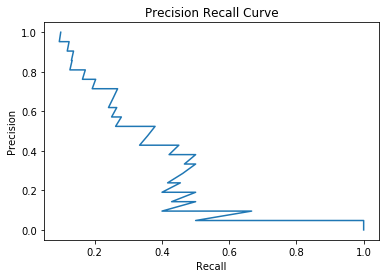

In [34]:
#Predicting proba
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()